In [6]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import scprep
import m_phate
import tslearn

import numpy as np

In [7]:
!ls data

cnn_graphreal2.npz		 graphreal2.npz
cnn_graphshared.pkl		 graphreal.npz
cnn_graphsynth2.npz		 graphsynth2.npz
decoder_trace_0.npy		 graphsynth.npz
decoder_trace_0_smalllr.npy	 m_phate_data_5comp_alt.npy
decoder_trace_1.npy		 m_phate_data_5comp.npy
decoder_trace_1_smalllr.npy	 sample_loss_elbo_alt.npy
decoder_trace_tensor_5comp.npy	 sample_loss_elbo.npy
decoder_trace_tensor.npy	 x_trace.npy
fcnn_graphshared.pkl		 y_trace.npy
fcnn_mphate_iterk25_intrak8.npy


In [8]:
m_phate_data = np.load('./data/fcnn_mphate_iterk25_intrak8.npy')
trace_data1 = np.load('./data/decoder_trace_tensor.npy')
trace_data2 = np.load('./data/decoder_trace_tensor_5comp.npy')
m_phate_data_5comp = np.load('./data/m_phate_data_5comp.npy')
m_phate_data_5comp_alt = np.load('./data/m_phate_data_5comp_alt.npy')
x_trace = np.load('./data/x_trace.npy')
y_trace = np.load('./data/y_trace.npy')
sample_loss = np.load('./data/sample_loss_elbo.npy')
trace_data1.shape, trace_data2.shape

((101, 100, 512), (101, 100, 512))

In [9]:
# for plots of hidden units in time
n_epochs = trace_data1.shape[0]
n_neurons = trace_data1.shape[-1]
n_samples = trace_data1.shape[1]

# the unique neuron id for each element of the flattened trace
neuron_ids = np.tile(np.arange(n_neurons), n_epochs)

# the current epoch for each element of the flattened trace
epoch = np.repeat(np.arange(n_epochs), n_neurons)

# the label of each digit we selected: this should be the same as `np.repeat(np.arange(10), 10)`
digit_ids = y_trace

In [10]:
X1 = m_phate_data.reshape(n_epochs,100,-1)
X1 = X1.transpose(1,0,-1)
X1 = X1.reshape(100,-1)

X2 = m_phate_data_5comp.reshape(n_epochs,100,-1)[0:1]
X2 = X2.transpose(1,0,-1)
X2 = X2.reshape(100,-1)

#X1.shape, X2.shape

In [237]:
from tslearn.utils import to_time_series, to_time_series_dataset
from tslearn.clustering import KernelKMeans


ts_dataset = to_time_series_dataset(X2)
sz = ts_dataset.shape[1]

gak_km = KernelKMeans(n_clusters=10,
                      kernel="gak",
                      kernel_params={"sigma": 0.05},
                      n_init=20,
                      verbose=False,
                      random_state=0)
y_pred = gak_km.fit_predict(ts_dataset)

y_pred

array([8, 4, 6, 8, 4, 6, 1, 1, 1, 6, 2, 1, 6, 6, 3, 7, 6, 7, 7, 1, 6, 8,
       1, 7, 1, 6, 7, 6, 9, 8, 8, 0, 8, 6, 4, 0, 5, 6, 0, 8, 3, 3, 8, 8,
       1, 7, 3, 7, 6, 7, 8, 5, 1, 4, 3, 1, 8, 3, 6, 9, 6, 7, 9, 1, 2, 4,
       6, 8, 2, 8, 8, 1, 7, 2, 6, 5, 2, 1, 2, 0, 3, 6, 8, 1, 0, 0, 8, 8,
       2, 7, 7, 6, 9, 6, 1, 7, 1, 9, 7, 2])

In [344]:
kmeans1 = KMeans(n_clusters=50, random_state=0).fit(X1)
kmeans2 = KMeans(n_clusters=50, random_state=0).fit(X2)

In [345]:
###### {0:3,1:9, 3:7, 0:3, 9:9 , 3:9, 6:5, 6:3, 3:9, 5:6, 6:5, 1:9, 3:7, 7:7, 2:0, 3:9, 6:5, 6:3, 1:4,}
#0, 1, 3, 0, 9, 3, 0, 6, 6, 3, 5, 6, 1, 3, 7, 2, 3, 6, 2, 6, 1, 0
#3, 9, 7, 3, 9, 9, 3, 5, 3, 9, 6, 5, 9, 7, 7, 0, 9, 5, 0, 3, 4, 3,
#kmeans.labels_, digit_ids

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# X is a numpy array with your features
# y is the label array
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(kmeans2.labels_.reshape(-1, 1))
#X_transform = enc.fit_transform(y_pred.reshape(-1, 1))

# apply your linear regression as you want
model = LogisticRegression()
model.fit(X_transform, digit_ids)
sklearn.metrics.accuracy_score(digit_ids, model.predict(X_transform))

0.69

In [125]:
X1.shape

(100, 102)

In [174]:
###### {0:3,1:9, 3:7, 0:3, 9:9 , 3:9, 6:5, 6:3, 3:9, 5:6, 6:5, 1:9, 3:7, 7:7, 2:0, 3:9, 6:5, 6:3, 1:4,}
#0, 1, 3, 0, 9, 3, 0, 6, 6, 3, 5, 6, 1, 3, 7, 2, 3, 6, 2, 6, 1, 0
#3, 9, 7, 3, 9, 9, 3, 5, 3, 9, 6, 5, 9, 7, 7, 0, 9, 5, 0, 3, 4, 3,
#kmeans.labels_, digit_ids

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# X is a numpy array with your features
# y is the label array
enc = OneHotEncoder(sparse=False)
X_transform = enc.fit_transform(kmeans2.labels_.reshape(-1, 1))

# apply your linear regression as you want
model = LogisticRegression()
model.fit(X_transform, digit_ids)
sklearn.metrics.accuracy_score(digit_ids, model.predict(X_transform))

0.52

In [294]:
sample_loss.T.shape, m_phate_data.shape, kmeans2.labels_.shape

((100, 101), (10100, 2), (100,))

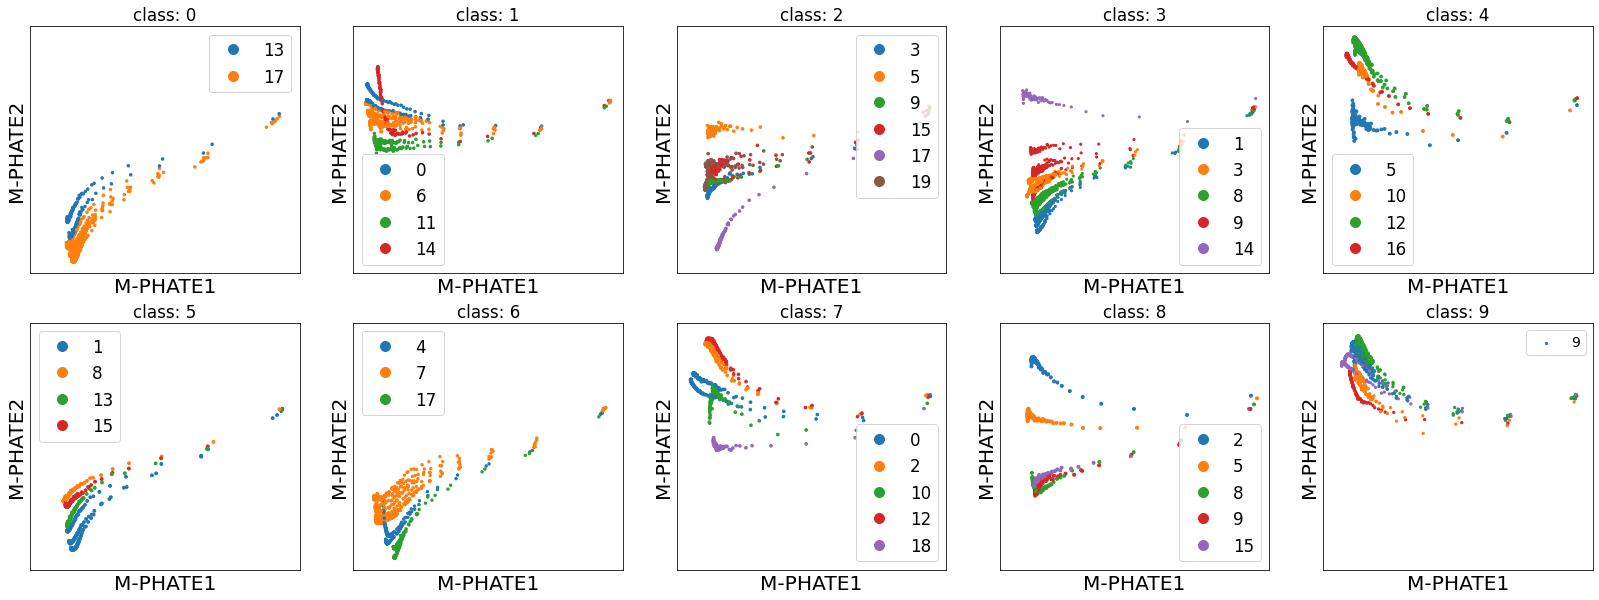

In [295]:
fig, axs = plt.subplots(
    2, 5, figsize=(28, 10), sharex='all', sharey='all')
for i,ax in enumerate(axs.reshape(-1)):
    scprep.plot.scatter2d(m_phate_data[np.tile(digit_ids, n_epochs)==i], c=np.tile(kmeans2.labels_,n_epochs)[np.tile(digit_ids, n_epochs) == i], 
                          ax=ax,title='class',label=i,legend=True, ticks=False, label_prefix="M-PHATE")
    ax.set_title('class: {}'.format(str(i)))
plt.legend()   

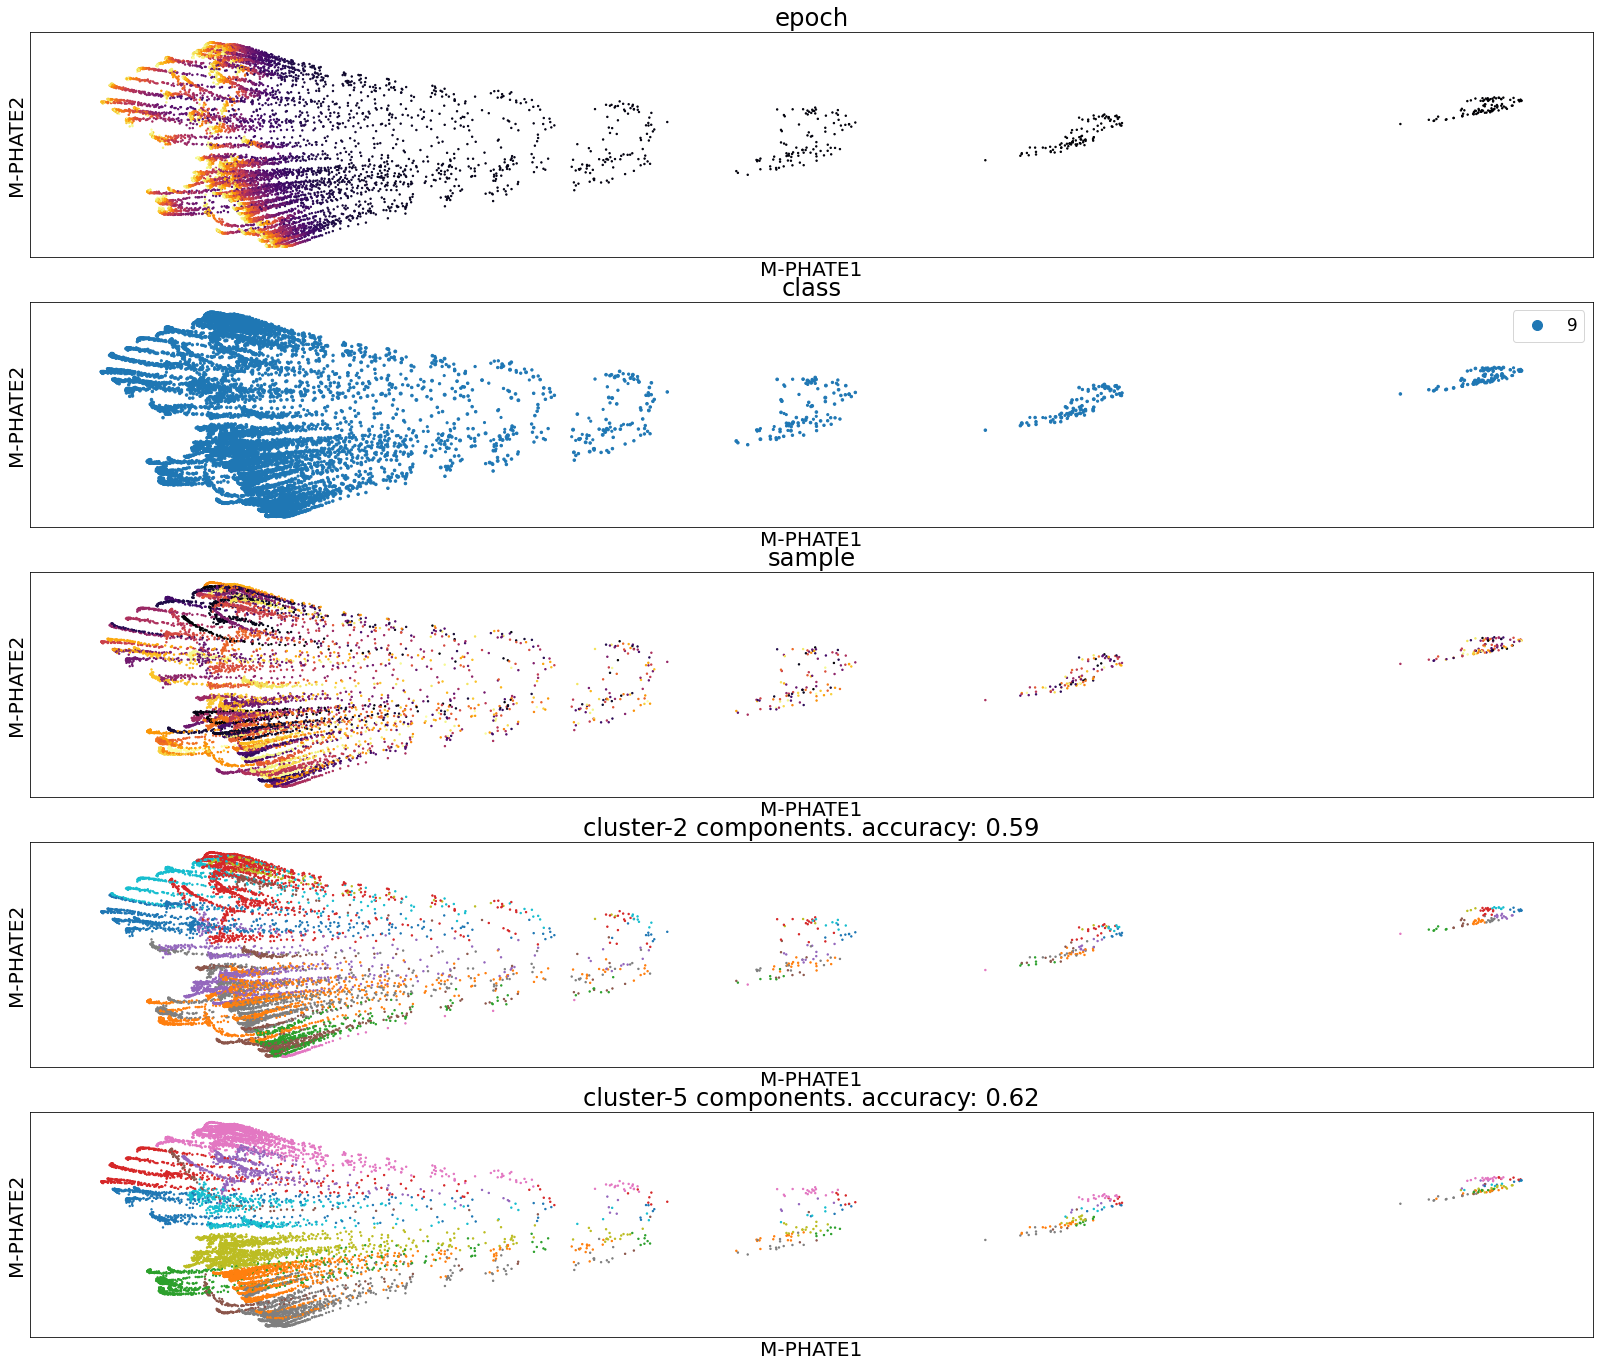

In [259]:
# plot the results for samples
plt.rc('font', size=14)
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(
    5, 1, figsize=(28, 24), sharex='all', sharey='all')
scprep.plot.scatter2d(m_phate_data, c=np.repeat(np.arange(n_epochs), n_samples), ax=ax1,legend=False, ticks=False,
                      title='epoch', label_prefix="M-PHATE")
for i in range(10):
    scprep.plot.scatter2d(m_phate_data[np.tile(digit_ids, n_epochs)==i], c=np.tile(digit_ids, n_epochs)[np.tile(digit_ids, n_epochs) == i], 
                          ax=ax2, title='class',label=i,legend=True, ticks=False, label_prefix="M-PHATE")
scprep.plot.scatter2d(m_phate_data, c=np.tile(np.arange(n_samples), n_epochs), ax=ax3,legend=False, title='sample',
                      ticks=False, label_prefix="M-PHATE")
scprep.plot.scatter2d(m_phate_data, c=np.tile(kmeans1.labels_, n_epochs), ax=ax4,legend=False, title='cluster-2 components. accuracy: 0.59',
                      ticks=False, label_prefix="M-PHATE")
scprep.plot.scatter2d(m_phate_data, c=np.tile(y_pred, n_epochs), ax=ax5,legend=False, title='cluster-5 components. accuracy: 0.62',
                      ticks=False, label_prefix="M-PHATE")


In [67]:
X = m_phate_data_5comp.reshape(n_epochs,100,-1)
X = X.transpose(1,0,-1)

In [68]:
X.shape

(100, 101, 5)

In [73]:
X_by_class = []
for i in range(10):
    X_by_class.append(X[digit_ids == i])

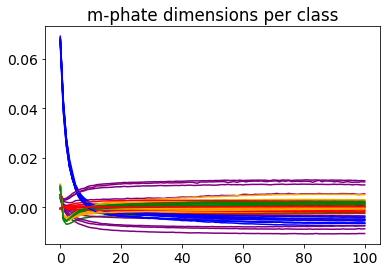

In [74]:
plt.title('m-phate dimensions per class')
for i in range(10):
    plt.plot(X_by_class[i][:,:,0].mean(axis=0),label='mphate 1',c='blue')
    plt.plot(X_by_class[i][:,:,1].mean(axis=0),label='mphate 2',c='purple')
    plt.plot(X_by_class[i][:,:,2].mean(axis=0),label='mphate 3',c='orange')
    plt.plot(X_by_class[i][:,:,3].mean(axis=0),label='mphate 4',c='green')
    plt.plot(X_by_class[i][:,:,4].mean(axis=0),label='mphate 5',c='red')

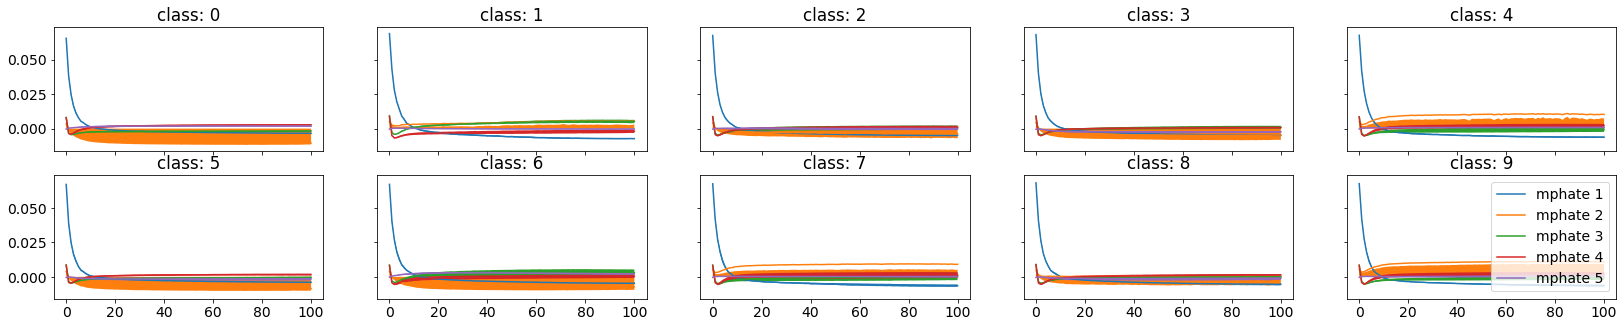

In [253]:
fig, axs = plt.subplots(
    2, 5, figsize=(28, 5), sharex='all', sharey='all')
for i,ax in enumerate(axs.reshape(-1)):
    ax.plot(X_by_class[i][:,:,0].mean(axis=0),label='mphate 1')
    ax.fill_between(np.arange(101), X_by_class[i][:,:,0].mean(axis=0)-X_by_class[i][:,:,0].std(axis=0), 
                    X_by_class[i][:,:,0].mean(axis=0)+X_by_class[i][:,:,0].std(axis=0))
    ax.plot(X_by_class[i][:,:,1].mean(axis=0),label='mphate 2')
    ax.fill_between(np.arange(101), X_by_class[i][:,:,1].mean(axis=0)-X_by_class[i][:,:,1].std(axis=0), 
                    X_by_class[i][:,:,1].mean(axis=0)*X_by_class[i][:,:,1].std(axis=0))
    ax.plot(X_by_class[i][:,:,2].mean(axis=0),label='mphate 3')
    ax.fill_between(np.arange(101), X_by_class[i][:,:,2].mean(axis=0)-X_by_class[i][:,:,2].std(axis=0), 
                    X_by_class[i][:,:,2].mean(axis=0)+X_by_class[i][:,:,2].std(axis=0))
    ax.plot(X_by_class[i][:,:,3].mean(axis=0),label='mphate 4')
    ax.fill_between(np.arange(101), X_by_class[i][:,:,3].mean(axis=0)-X_by_class[i][:,:,3].std(axis=0), 
                    X_by_class[i][:,:,3].mean(axis=0)+X_by_class[i][:,:,3].std(axis=0))
    ax.plot(X_by_class[i][:,:,4].mean(axis=0),label='mphate 5')
    ax.fill_between(np.arange(101), X_by_class[i][:,:,4].mean(axis=0)-X_by_class[i][:,:,4].std(axis=0), 
                    X_by_class[i][:,:,4].mean(axis=0)+X_by_class[i][:,:,4].std(axis=0))
    ax.set_title('class: {}'.format(str(i)))
plt.legend()

In [268]:
X_by_cluster = []
for i in range(10):
    X_by_cluster.append(X[kmeans2.labels_ == i])

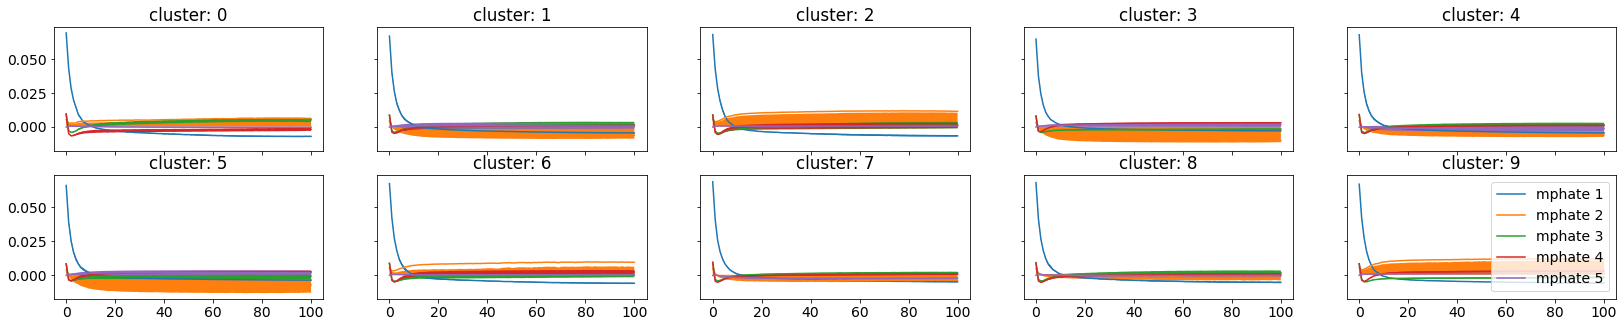

In [270]:
fig, axs = plt.subplots(
    2, 5, figsize=(28, 5), sharex='all', sharey='all')
for i,ax in enumerate(axs.reshape(-1)):
    ax.plot(X_by_cluster[i][:,:,0].mean(axis=0),label='mphate 1')
    ax.fill_between(np.arange(101), X_by_cluster[i][:,:,0].mean(axis=0)-X_by_cluster[i][:,:,0].std(axis=0), 
                    X_by_cluster[i][:,:,0].mean(axis=0)+X_by_cluster[i][:,:,0].std(axis=0))
    ax.plot(X_by_cluster[i][:,:,1].mean(axis=0),label='mphate 2')
    ax.fill_between(np.arange(101), X_by_cluster[i][:,:,1].mean(axis=0)-X_by_cluster[i][:,:,1].std(axis=0), 
                    X_by_cluster[i][:,:,1].mean(axis=0)*X_by_cluster[i][:,:,1].std(axis=0))
    ax.plot(X_by_cluster[i][:,:,2].mean(axis=0),label='mphate 3')
    ax.fill_between(np.arange(101), X_by_cluster[i][:,:,2].mean(axis=0)-X_by_cluster[i][:,:,2].std(axis=0), 
                    X_by_cluster[i][:,:,2].mean(axis=0)+X_by_cluster[i][:,:,2].std(axis=0))
    ax.plot(X_by_cluster[i][:,:,3].mean(axis=0),label='mphate 4')
    ax.fill_between(np.arange(101), X_by_cluster[i][:,:,3].mean(axis=0)-X_by_cluster[i][:,:,3].std(axis=0), 
                    X_by_cluster[i][:,:,3].mean(axis=0)+X_by_cluster[i][:,:,3].std(axis=0))
    ax.plot(X_by_cluster[i][:,:,4].mean(axis=0),label='mphate 5')
    ax.fill_between(np.arange(101), X_by_cluster[i][:,:,4].mean(axis=0)-X_by_cluster[i][:,:,4].std(axis=0), 
                    X_by_cluster[i][:,:,4].mean(axis=0)+X_by_cluster[i][:,:,4].std(axis=0))
    ax.set_title('cluster: {}'.format(str(i)))
plt.legend()

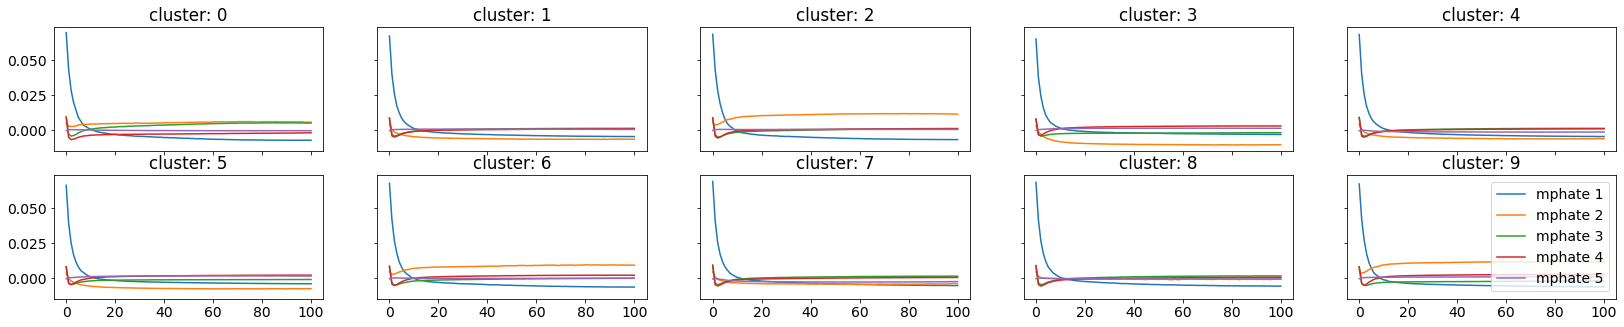

In [271]:
fig, axs = plt.subplots(
    2, 5, figsize=(28, 5), sharex='all', sharey='all')
for i,ax in enumerate(axs.reshape(-1)):
    ax.plot(X_by_cluster[i][:,:,0].mean(axis=0),label='mphate 1')
    ax.plot(X_by_cluster[i][:,:,1].mean(axis=0),label='mphate 2')
    ax.plot(X_by_cluster[i][:,:,2].mean(axis=0),label='mphate 3')
    ax.plot(X_by_cluster[i][:,:,3].mean(axis=0),label='mphate 4')
    ax.plot(X_by_cluster[i][:,:,4].mean(axis=0),label='mphate 5')
    ax.set_title('cluster: {}'.format(str(i)))
plt.legend()

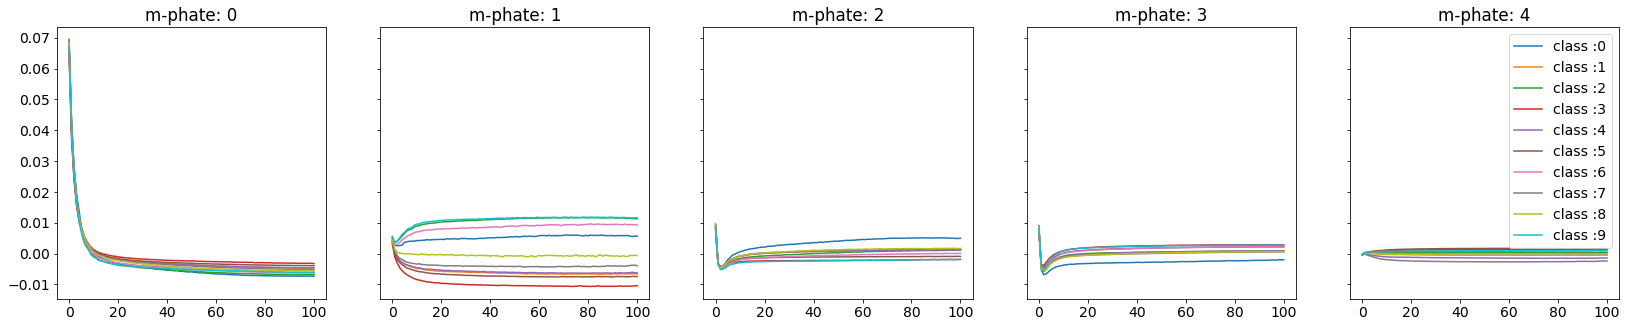

In [272]:
fig, axs = plt.subplots(
    1, 5, figsize=(28, 5), sharex='all', sharey='all')
for i,ax in enumerate(axs.reshape(-1)):
    for j in range(10):
        ax.plot(X_by_cluster[j][:,:,i].mean(axis=0),label='class :{}'.format(j))
    ax.set_title('m-phate: {}'.format(str(i)))
plt.legend()